In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
"""

Multiple Linear Regression: An expanded form of Linear Regression in which we have
                            2 or more independent variables and 1 dependent variable,
                            rather than basic linear regression which only has 1
                            independent variable and 1 dependent variable.
                            
The purpose of Multiple Linear Regression is to create models in which we use more 
than 1 variable to predict an end result (or dependent variable).

It is important to note that just because you have more independent variables,
does not always mean that your model will be more accurate when predicting some kind
of dependent variable. There are many things to watch out for when building the most
accurate model according to your data set.

What to look out for:
    R Squared
    R Squared Adjusted
    R Squared Predicted
    P Values
    Multicollinearity
    VIF (Variance Inflation Factor)
    F Value
    
VIF General Rule:
    1. If the mean of the VIF values is above 5, you have multicollinearity.
    2. If any VIF values exceed 10, that variable is causing multicollinearity.

"""

"\n\nMultiple Linear Regression: An expanded form of Linear Regression in which we have\n                            2 or more independent variables and 1 dependent variable,\n                            rather than basic linear regression which only has 1\n                            independent variable and 1 dependent variable.\n                            \nThe purpose of Multiple Linear Regression is to create models in which we use more \nthan 1 variable to predict an end result (or dependent variable).\n\nIt is important to note that just because you have more independent variables,\ndoes not always mean that your model will be more accurate when predicting some kind\nof dependent variable. There are many things to watch out for when building the most\naccurate model according to your data set.\n\nWhat to look out for:\n    R Squared\n    R Squared Adjusted\n    R Squared Predicted\n    P Values\n    Multicollinearity\n    VIF (Variance Inflation Factor)\n    F Value\n    \nVIF 

In [4]:
def SingleRegression(x, y):
    print('Single Linear Regression')
    
    # Build model
    model = LinearRegression().fit(x, y)

    # Get predicted y values
    yhat = model.intercept_ + (model.coef_[0] * x)
    
    # Get R Squared
    r2 = r2_score(y, yhat)
    
    # Get mean squared error
    mse = mean_squared_error(y, yhat)
    
    # Print Summary
    print("Equation: y = {} + {} * xi".format(model.intercept_[0], model.coef_[0][0]))
    print("R Squared: {}%".format(r2 * 100))
    print("Mean Squared Error: {}".format(mse))
    
    # Get stats
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())
    
    # Plot
    plt.scatter(x, y, color='blue', label='Samples')
    plt.plot(x, yhat, color='red', label='Line of Regression')
    plt.legend()
    plt.show()
    


In [5]:
data = {
    'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
    'Month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
    'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
}

Single Linear Regression
Equation: y = -99.46431881371655 + 564.2038924930492 * xi
R Squared: 87.57089547891358%
Mean Squared Error: 5289.701729996909
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.95e-11
Time:                        12:39:25   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

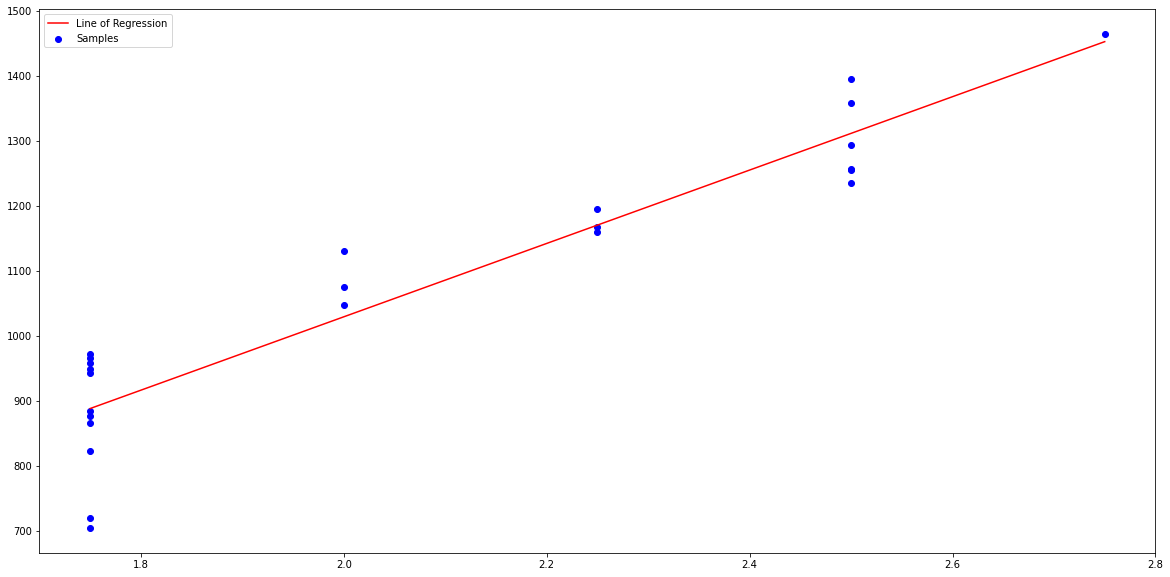

Single Linear Regression
Equation: y = 4471.339321357287 + -588.9620758483036 * xi
R Squared: 85.07066076772139%
Mean Squared Error: 6353.776447105782
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.49e-10
Time:                        12:39:25   Log-Likelihood:                -139.14
No. Observations:                  24   AIC:                             282.3
Df Residuals:                      22   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

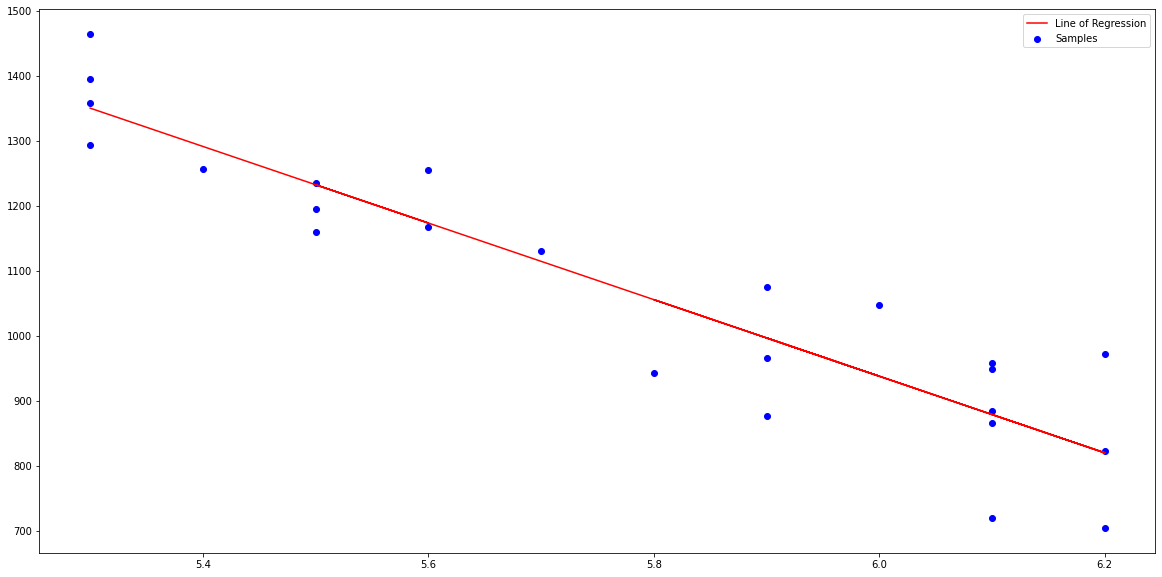

In [6]:
"""

The process of doing a Multiple Linear Regression analysis occurs in many stages,
with a lot of prep work before getting to the actual Multiple Linear Regression.

So I'm going to walk through this example and explain things along the way.

In this section, all we're doing is checking to make sure that both of the independent
variables are actually correlated with the dependent variable. It would not make sense
to include an independent variable in our multiple regressions analysis, if it did
not have a strong relationship with the dependent variable on its own.

The first thing we want to do to check for these correlations, is visually inspect the data
using a scatter plot and plotting the regression line - which is what we're doing
here.

"""

# Extract Data
df = pd.DataFrame(data, columns=data.keys())
x1 = np.array(df['Interest_Rate']).reshape(-1, 1) # Interest rate values
x2 = np.array(df['Unemployment_Rate']).reshape(-1, 1) # Unemployment rate values
y = np.array(df['Stock_Index_Price']).reshape(-1, 1) # Stock Index Price Values

# Interest Rate (x1) vs. Stock Price
SingleRegression(x1, y)

# Unemployment Rate (x2) vs. Stock Price
SingleRegression(x2, y)

Single Linear Regression
Equation: y = 7.587025023169603 + -0.8741427247451345 * xi
R Squared: 85.71309651318309%
Mean Squared Error: 0.014911955514365144
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.13e-11
Time:                        12:42:49   Log-Likelihood:                 16.413
No. Observations:                  24   AIC:                            -28.83
Df Residuals:                      22   BIC:                            -26.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

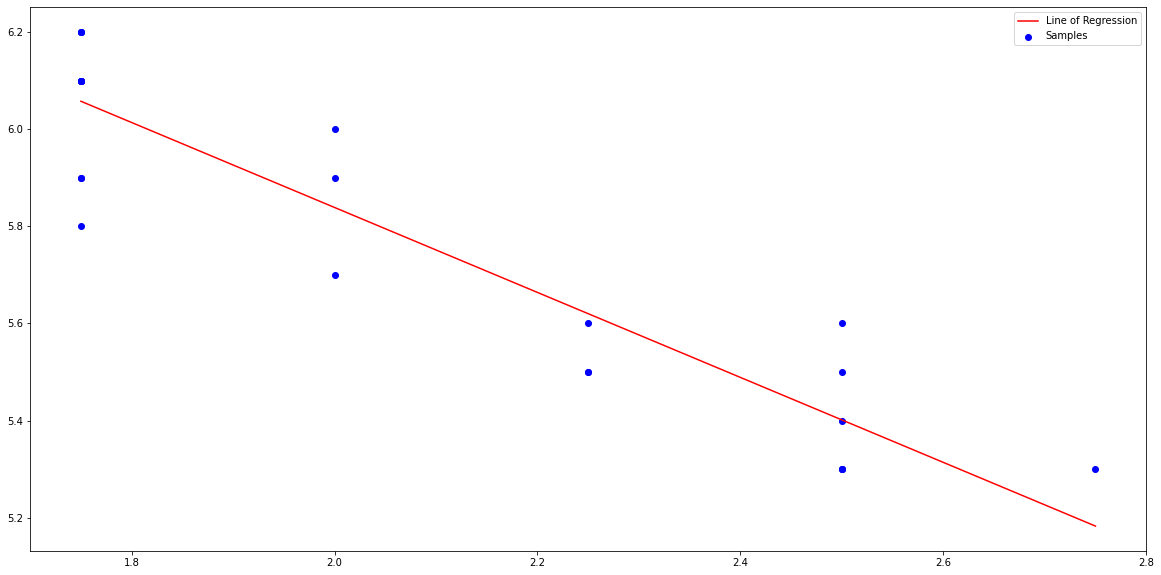

In [7]:
"""

Next, we need to look for a correlation between our independent variables.

If there is a correlation betweeen our independent variables, then that can mess
up our model.

For example:
Say you're trying to build a model that has independent variables, Table Salt &
Sea Salt, and a dependent variable, Taste of Saltiness.
This model is going to attempt to discern between which salt contribues more/less
to the saltyness dependent variable, but it's going to be very hard for the model
to explain the variability in the dependent variable due to differences in the 
independent variables because they're essentially the same thing, and are going
to have the same effect on the dependent variable. Whether you have 100mg table
salt and 10mg sea salt, or vice-versa, the outcome is not really going to change
all that much.

Therefore, we are actually going to build single linear models between both table
& sea salt, and their dependent variable, saltiness, and choose only the independent
variable that is better at predicting (larger R Squared, smaller squared error, etc)
the dependent variable, to put in our multiple regressions model.

So here, we're going to look for a correlation between interest rate, and unemployment
rate. If we find a strong/significiant correlation, then most likely we will only be
using one in our final model. If there is no correlation, then we will feel much more
confident that both variables make sense to use in our final model.

And the results of this regression reveal a significiant correlation. We have an 
R Squared of ~85% which means that it is probably going to be a bad idea to use
both of these independent variables together in a multiple regression.

Let's keep them in for now because I'm going to show you how to spot the reason
why this is going to be problematic when doing a multiple regression.

"""

SingleRegression(x1, x2)

In [ ]:
# Speed up multiple regression

def MultipleRegression(x, y):
    print('Multiple Linear Regression')
    
    # Build model
    model = LinearRegression().fit(x, y)
    
    print("Equation: y = {} + {} * x1 + {} * x2".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))
    
    X = sm.add_constant(x)
    vifs = [vif(X.values, i) for i in range(len(X.columns))]
    print("VIF Scores:")
    for col, val in zip(X.columns, vifs):
        print("{} = {}".format(col, val))
    
    # Get stats
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    print(results.summary())

In [9]:
"""

So here we're going to move forward with our multiple regression, even though
we've already kindof determined that there is too much multicollinearity 
to use both of these variables. I just want to show you what's going to happen
to our model.

The important score to look at when determining if multicollinearity is a problem
in your model, are the VIF scores. That stands for Variance Inflation Factor,
and the higher that number is, the more multicollinearity problems you're going
to encounter.

VIF General Rule:
    1. If the mean of the VIF values is above 5, you have multicollinearity.
    2. If any VIF values exceed 10, that variable is causing multicollinearity.
    
We see that our VIF factors for both our independent variables is above 5, 
meaning that most likely, the R Squared is higher because that extra explained
variance is coming from the fact that these independent variables are explaining
each other.

For this reason, we would say that this model should be thrown out, and we would
then go back and choose between one of our Single Linear Regression models
as the "best fit" model for this problem.

Another quick note about these VIF scores. They are almost identical between the
independent variables. That is because they are our only predictors, and the 
VIF scores explain variance between the independent variables. Also, they're
highly correlated so the difference between the two numbers barely differs.
This is just another indicator of multicollinearity problems.

Note about plotting:
The reason I'm not plotting a graph here, is just because I don't really need to.
I would have to have a 3 axis plot, which I definitely could do, it just won't
really tell me much more than I got from seeing the individual independent variables
plotted against the dependent variable.

However, there are some instances, especially when working with multidimensional 
datasets, in which viewing a plot/hyper-space with more than 2 dimensions could
be helpful.

"""

# Extract Data
X = df[['Interest_Rate', 'Unemployment_Rate']] # Interest Rate & Unemployment Rate values

# Regress
MultipleRegression(X, y)

Multiple Linear Regression
Equation: y = 1798.4039776258546 + 345.54008701056574 * x1 + -250.14657136938058 * x2
VIF Scores:
const = 3897.8893722805465
Interest_Rate = 6.9994173399627195
Unemployment_Rate = 6.999417339962709
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           4.04e-11
Time:                        12:59:46   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                           

In [ ]:
"""

Summary:

This actually wasn't a great dataset for this type of problem. I'll work on
another problem that displays an instance in which we would accept a 
multiple regression as the best model.

"""